# Big Data com PySpark

## Configurações Iniciais

In [1]:
import os

os.environ["SPARK_HOME"] = "D:\spark\spark-3.2.1-bin-hadoop3.2"
os.environ['HADOOP_HOME'] = "D:\spark\spark-3.2.1-bin-hadoop3.2\hadoop" 

In [2]:
import findspark
findspark.init()

In [3]:
from pyspark.sql import SparkSession

import pyspark.sql as py

In [4]:
spark = SparkSession.builder.master('local[*]').getOrCreate()

In [5]:
spark

## PySpark read CSV

In [6]:
enem_2019 = spark.read.csv(r"D:\DESKTOP\Documents\TCC\base_dados\enem\microdados_enem2019\DADOS\MICRODADOS_ENEM_2019.csv", sep=';', inferSchema=True, header=True)

In [7]:
total_dados = enem_2019.count()

total_dados

5095270

In [8]:
columns=['NU_ANO', 'NU_IDADE', 'TP_COR_RACA', 'TP_ESTADO_CIVIL', 'TP_NACIONALIDADE','TP_SEXO', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'TP_ST_CONCLUSAO', 'TP_ENSINO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'IN_BRAILLE', 'IN_AMPLIADA_18', 'IN_AMPLIADA_24', 'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006']

In [9]:
enem_2019_selected = enem_2019.select(columns)

In [10]:
enem_2019_selected.limit(5).toPandas()

,NU_ANO,NU_IDADE,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_SEXO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO,...,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q001,Q002,Q003,Q004,Q005,Q006
0,2019,36,3,1,1,M,Sorocaba,SP,1,NaN,...,0,0,0,0,B,B,A,A,2,A
1,2019,23,1,1,1,M,Feira de Santana,BA,1,1.0,...,0,0,0,0,C,E,B,B,4,C
2,2019,39,3,1,1,F,Fortaleza,CE,1,1.0,...,0,0,0,0,E,E,B,C,2,B
3,2019,25,1,1,1,F,Palmas,TO,1,NaN,...,0,0,0,0,C,E,B,D,4,E
4,2019,22,1,1,1,F,Contagem,MG,1,1.0,...,0,0,0,0,E,E,C,C,3,G


## Verificando Valores NAN

In [11]:
from pyspark.sql.functions import col,isnan,when,count

In [12]:
nan = enem_2019_selected.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in enem_2019_selected.columns]).toPandas()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [14]:
nan = nan.T

nan.rename(columns = {0: 'nan_value'}, inplace=True)

In [15]:
missing = nan.loc[nan['nan_value'] > 0]

In [16]:
missing.sort_values(by='nan_value',inplace = True)

C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [17]:
missing

,nan_value
NU_IDADE,69
NU_NOTA_CH,1172125
NU_NOTA_LC,1172125
NU_NOTA_COMP1,1172126
NU_NOTA_COMP2,1172126
NU_NOTA_COMP3,1172126
NU_NOTA_COMP4,1172126
NU_NOTA_COMP5,1172126
NU_NOTA_REDACAO,1172126
NU_NOTA_CN,1384837


C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


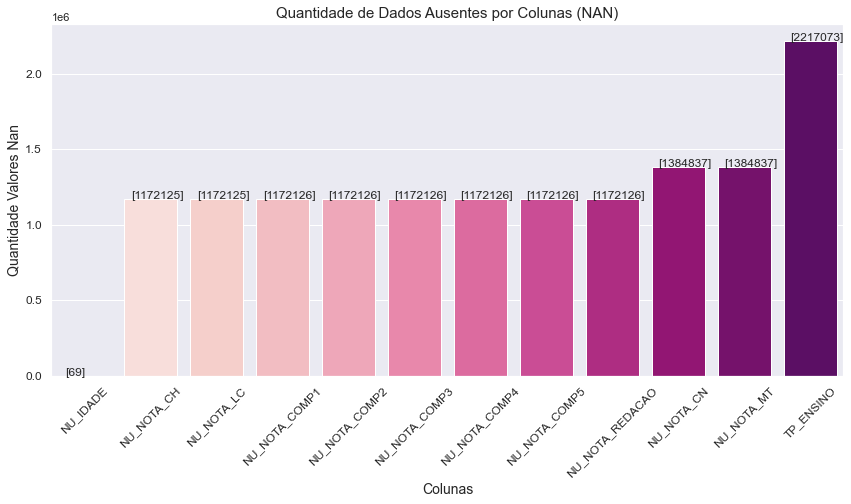

In [18]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x=missing.index, y=missing['nan_value'], ax=ax, data=missing,     
            palette='RdPu')

ax.set_title("Quantidade de Dados Ausentes por Colunas (NAN)", fontdict={'fontsize':15})
ax.set_xlabel('Colunas', fontdict={'fontsize':14})
ax.set_ylabel('Quantidade Valores Nan', fontdict={'fontsize':14})

fig.tight_layout()

ax.tick_params(labelsize=12)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

for i in range(missing.size):
    x = (-0.3 + i)
    y = (missing.values[i] + 50)
    plt.annotate(missing.values[i], (x, y), fontsize=12)

In [19]:
missing_percent = missing.copy()
missing_percent['total'] = total_dados

missing_percent['percentual'] = round((missing_percent.nan_value / missing_percent.total) * 100, 2)

missing_percent

,nan_value,total,percentual
NU_IDADE,69,5095270,0.00
NU_NOTA_CH,1172125,5095270,23.00
NU_NOTA_LC,1172125,5095270,23.00
NU_NOTA_COMP1,1172126,5095270,23.00
NU_NOTA_COMP2,1172126,5095270,23.00
NU_NOTA_COMP3,1172126,5095270,23.00
NU_NOTA_COMP4,1172126,5095270,23.00
NU_NOTA_COMP5,1172126,5095270,23.00
NU_NOTA_REDACAO,1172126,5095270,23.00
NU_NOTA_CN,1384837,5095270,27.18


Conforme tabela acima, foi iremos desconsiderar os dados da coluna TP_ENSINO por conter muitos valores NANs, adotando como padrão excluir colunas com mais de 30% dos dados Nan

In [25]:
columns

['NU_IDADE',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'NU_NOTA_CN',
 'NU_NOTA_MT',
 'TP_ENSINO']

In [26]:
enem_2019_selected_nan = enem_2019.select(columns)

In [27]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=enem_2019_selected_nan.columns, 
    outputCols=["{}".format(c) for c in enem_2019_selected_nan.columns]
    ).setStrategy("median")

imputer

Imputer_c988ee607e8f

In [28]:
columns = list(missing.index)

In [29]:
# Add imputation cols to df
df = imputer.fit(enem_2019_selected_nan).transform(enem_2019_selected_nan)

In [30]:
df2 = df.drop('TP_ENSINO')

df2.show()

+--------+----------+----------+-------------+-------------+-------------+-------------+-------------+---------------+----------+----------+
|NU_IDADE|NU_NOTA_CH|NU_NOTA_LC|NU_NOTA_COMP1|NU_NOTA_COMP2|NU_NOTA_COMP3|NU_NOTA_COMP4|NU_NOTA_COMP5|NU_NOTA_REDACAO|NU_NOTA_CN|NU_NOTA_MT|
+--------+----------+----------+-------------+-------------+-------------+-------------+-------------+---------------+----------+----------+
|      36|     510.6|     526.2|          120|          120|          120|          120|          100|            580|     470.2|     501.0|
|      23|     510.6|     526.2|          120|          120|          120|          120|          100|            580|     470.2|     501.0|
|      39|     510.6|     526.2|          120|          120|          120|          120|          100|            580|     470.2|     501.0|
|      25|     503.6|     537.3|          120|          120|          120|          100|            0|            460|     483.8|     392.0|
|      22|   

In [31]:
df2.limit(10).toPandas()

,NU_IDADE,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_MT
0,36,510.6,526.2,120,120,120,120,100,580,470.2,501.0
1,23,510.6,526.2,120,120,120,120,100,580,470.2,501.0
2,39,510.6,526.2,120,120,120,120,100,580,470.2,501.0
3,25,503.6,537.3,120,120,120,100,0,460,483.8,392.0
4,22,575.5,570.7,160,120,180,200,200,860,513.6,677.0
5,37,644.9,564.2,160,200,180,180,80,800,563.7,675.3
6,22,488.4,507.2,140,120,120,160,60,600,484.6,594.7
7,20,510.6,526.2,120,120,120,120,100,580,470.2,501.0
8,20,510.6,526.2,120,120,120,120,100,580,470.2,501.0
9,17,548.1,502.5,120,40,120,120,0,400,543.9,480.7


## Outliers

In [32]:
import seaborn as sns

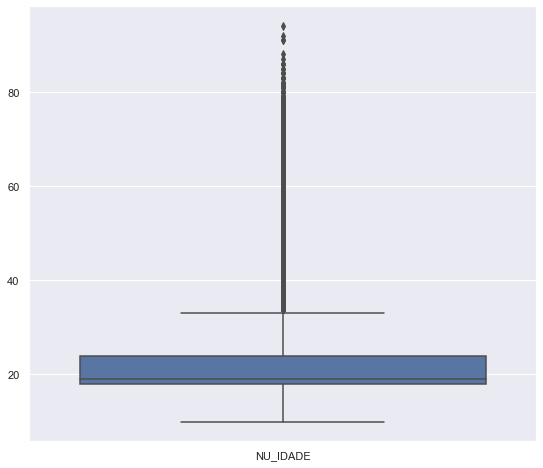

In [33]:
x = df2.select('NU_IDADE').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

## Análises Distribuição dos Dados

In [34]:
from pyspark.sql.functions import col, skewness, kurtosis
df2.select(skewness('NU_IDADE'),kurtosis('NU_IDADE')).show()

+------------------+------------------+
|skewness(NU_IDADE)|kurtosis(NU_IDADE)|
+------------------+------------------+
|2.2563588381879693| 5.821632358798867|
+------------------+------------------+



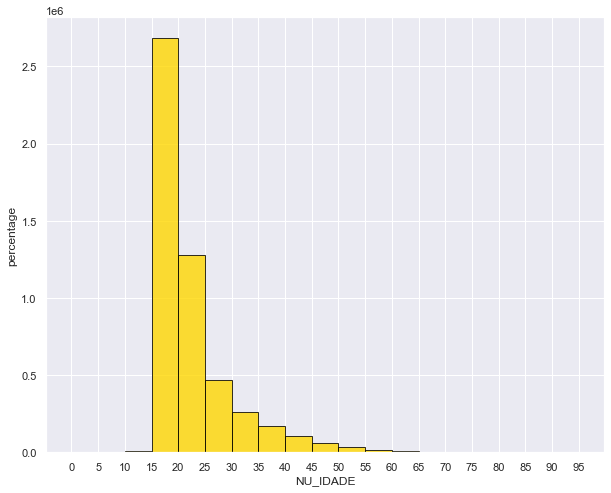

In [35]:
import numpy as np
import scipy.stats as ss

var = 'NU_IDADE'
plot_data = df2.select(var).toPandas()
x= plot_data[var]

bins = np.arange(0, 100, 5.0)
#sns.histplot(data=lista, stat="density", kde=True)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='gold', ec='black')

plt.xlabel('NU_IDADE')
plt.ylabel('percentage')
plt.xticks(bins)
plt.show()

## Correlação

### Quantitativas - Correlação de Pearson

In [ ]:
from pyspark.mllib.stat import Statistics
import pandas as pd

corr_data = df2

col_names = corr_data.columns
features = df2.rdd.map(lambda row: row[0:10000])  
corr_mat=Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_names, col_names

print(corr_df.to_string())

https://stackoverflow.com/questions/58070125/how-to-properly-use-the-chisquaretest-function-in-pyspark


## Dummies

In [ ]:
columns_quali = [
'TP_SEXO',
'TP_COR_RACA',
'TP_ESTADO_CIVIL',
'SG_UF_RESIDENCIA',
'Q001',
'Q002',
'Q003',
'Q004',
'Q006']

In [ ]:
enem_2019_quali = enem_2019_selected.select(columns_quali)

In [ ]:
enem_2019_quali.limit(10).toPandas()

NameError: name 'enem_2019_quali' is not defined

https://spark.apache.org/docs/3.2.0/api/python/reference/pyspark.pandas/api/pyspark.pandas.get_dummies.html


https://amigoedu.com.br/blogdoamigo/comocalcularanotadoenem

https://runawayhorse001.github.io/LearningApacheSpark/exploration.html

https://docs.microsoft.com/en-us/azure/databricks/_static/notebooks/pandas-to-pandas-api-on-spark-in-10-minutes.html
